In [1]:
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path
import numpy as np
from scipy import stats
plt.style.use("ggplot")

In [7]:
files = sorted(Path("./").glob("bootstrap_output_*n500.nc"))

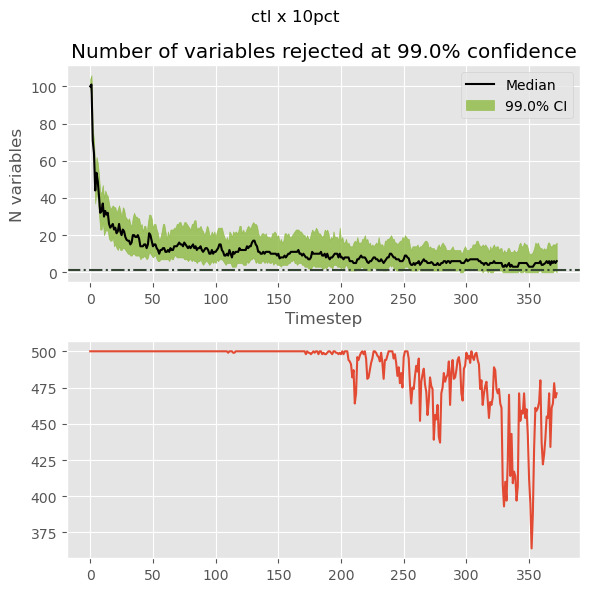

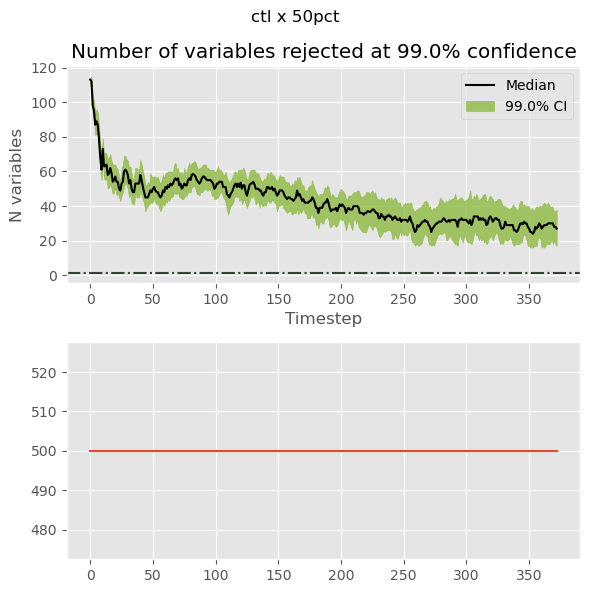

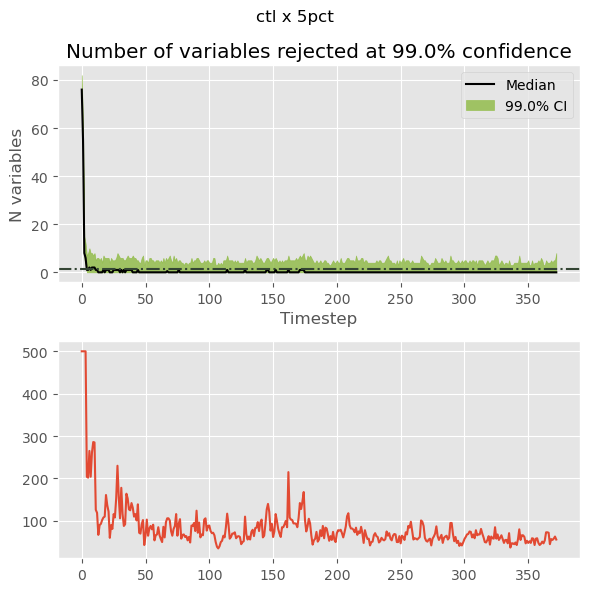

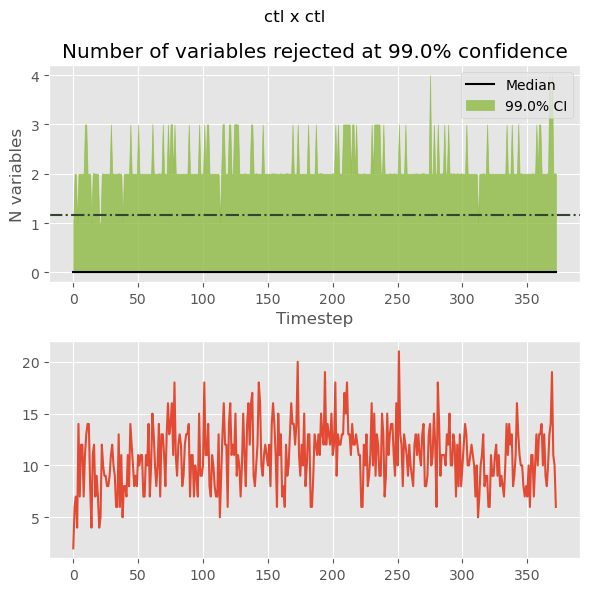

In [13]:
for _file in files:
    case_a, case_b = _file.stem.split("_")[2:4]
    n_iter = int(_file.stem.split("_")[-1][1:])
    
    ks_res = xr.open_dataset(_file)
    ks_pval = ks_res["pval"].values
    
    fig, axes = plt.subplots(2, 1, figsize=(6, 6))
    REJECT_THR = 0.01
    quantile = REJECT_THR * 100
    time_step = np.arange(ks_res.time.shape[0])

    n_reject = np.array((ks_pval < REJECT_THR).sum(axis=1))
    n_reject_mean = np.median(n_reject, axis=0)
    n_reject_lq = np.percentile(n_reject, quantile, axis=0)
    n_reject_uq = np.percentile(n_reject, 100 - quantile, axis=0)

    axes[0].plot(time_step, n_reject_mean, color="black", lw=1.5, label="Median"),
    # ln_lq, = axes[0].plot(n_reject_lq, color="darkblue", lw=1.0, ls="-", label=f"{quantile}%"),
    # ln_uq, = axes[0].plot(n_reject_uq, color="darkred", lw=1.0, ls="-", label=f"{100 - quantile}%")
    axes[0].fill_between(time_step, n_reject_lq, n_reject_uq, color="C5", alpha=0.8, label=f"{100 - quantile}% CI")
    axes[0].legend()

    axes[0].axhline(REJECT_THR * ks_pval.shape[1], color="#343", ls="-.")
    axes[0].set_title(f"Number of variables rejected at {(1 - REJECT_THR) * 100}% confidence")
    axes[0].set_xlabel("Timestep")
    axes[0].set_ylabel("N variables")

    test = (n_reject > ks_pval.shape[1] * REJECT_THR).sum(axis=0)
    axes[1].plot(test)
    
    _reject = f"{REJECT_THR:.2f}".replace(".", "p")
    fig.suptitle(f"{case_a} x {case_b}")
    plt.tight_layout()
    plt.savefig(f"plt_{case_a}-{case_b}_n{n_iter}.png")

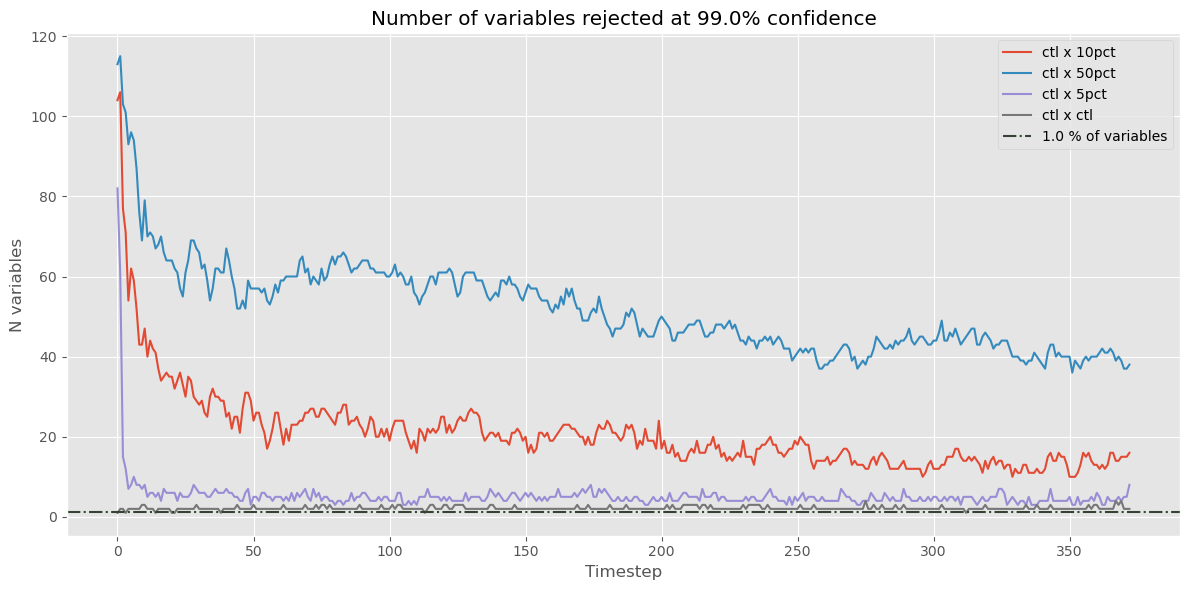

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
# REJECT_THR = 0.05
quantile = REJECT_THR * 100
reject_test = {}
n_reject = {}
for _file in files:
    case_a, case_b = _file.stem.split("_")[2:4]
    n_iter = int(_file.stem.split("_")[-1][1:])
    
    ks_res = xr.open_dataset(_file)
    ks_pval = ks_res["pval"].values
    
    time_step = np.arange(ks_res.time.shape[0])

    n_reject[(case_a, case_b)] = np.array((ks_pval < REJECT_THR).sum(axis=1))
    n_reject_mean = np.median(n_reject[(case_a, case_b)], axis=0)
    n_reject_lq = np.percentile(n_reject[(case_a, case_b)], quantile, axis=0)
    n_reject_uq = np.percentile(n_reject[(case_a, case_b)], 100 - quantile, axis=0)
    
    reject_test[(case_a, case_b)] = n_reject_uq
    
    axes.plot(time_step, n_reject_uq, lw=1.5, label=f"{case_a} x {case_b}"),
    # ln_lq, = axes[0].plot(n_reject_lq, color="darkblue", lw=1.0, ls="-", label=f"{quantile}%"),
    # ln_uq, = axes[0].plot(n_reject_uq, color="darkred", lw=1.0, ls="-", label=f"{100 - quantile}%")
    # axes[0].fill_between(time_step, n_reject_lq, n_reject_uq, color="C5", alpha=0.8, label=f"{100 - quantile}% CI")

axes.axhline(REJECT_THR * ks_pval.shape[1], color="#343", ls="-.", label=f"{REJECT_THR * 100} % of variables")
axes.set_title(f"Number of variables rejected at {(1 - REJECT_THR) * 100}% confidence")
axes.set_xlabel("Timestep")
axes.set_ylabel("N variables")

axes.legend()

_reject = f"{REJECT_THR:.2f}".replace(".", "p")
plt.tight_layout()
plt.savefig(f"plt_all_cases.png")

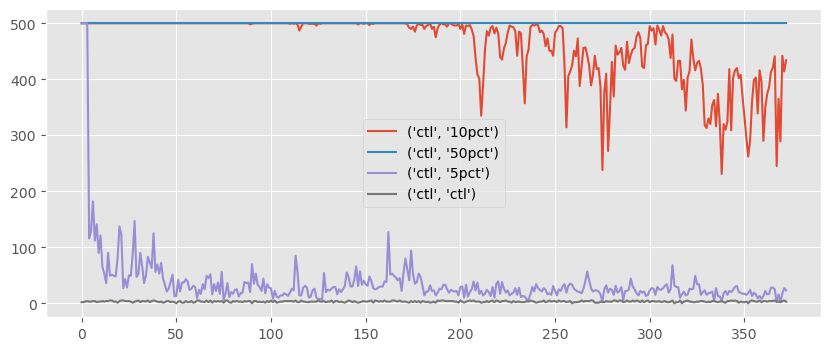

In [15]:
test = {_key: (n_reject[_key] > reject_test[("ctl", "ctl")]).sum(axis=0) for _key in reject_test}
fig, axes = plt.subplots(1, 1, figsize=(10, 4))

for _case in test:
    axes.plot(test[_case], label=_case)
axes.legend()

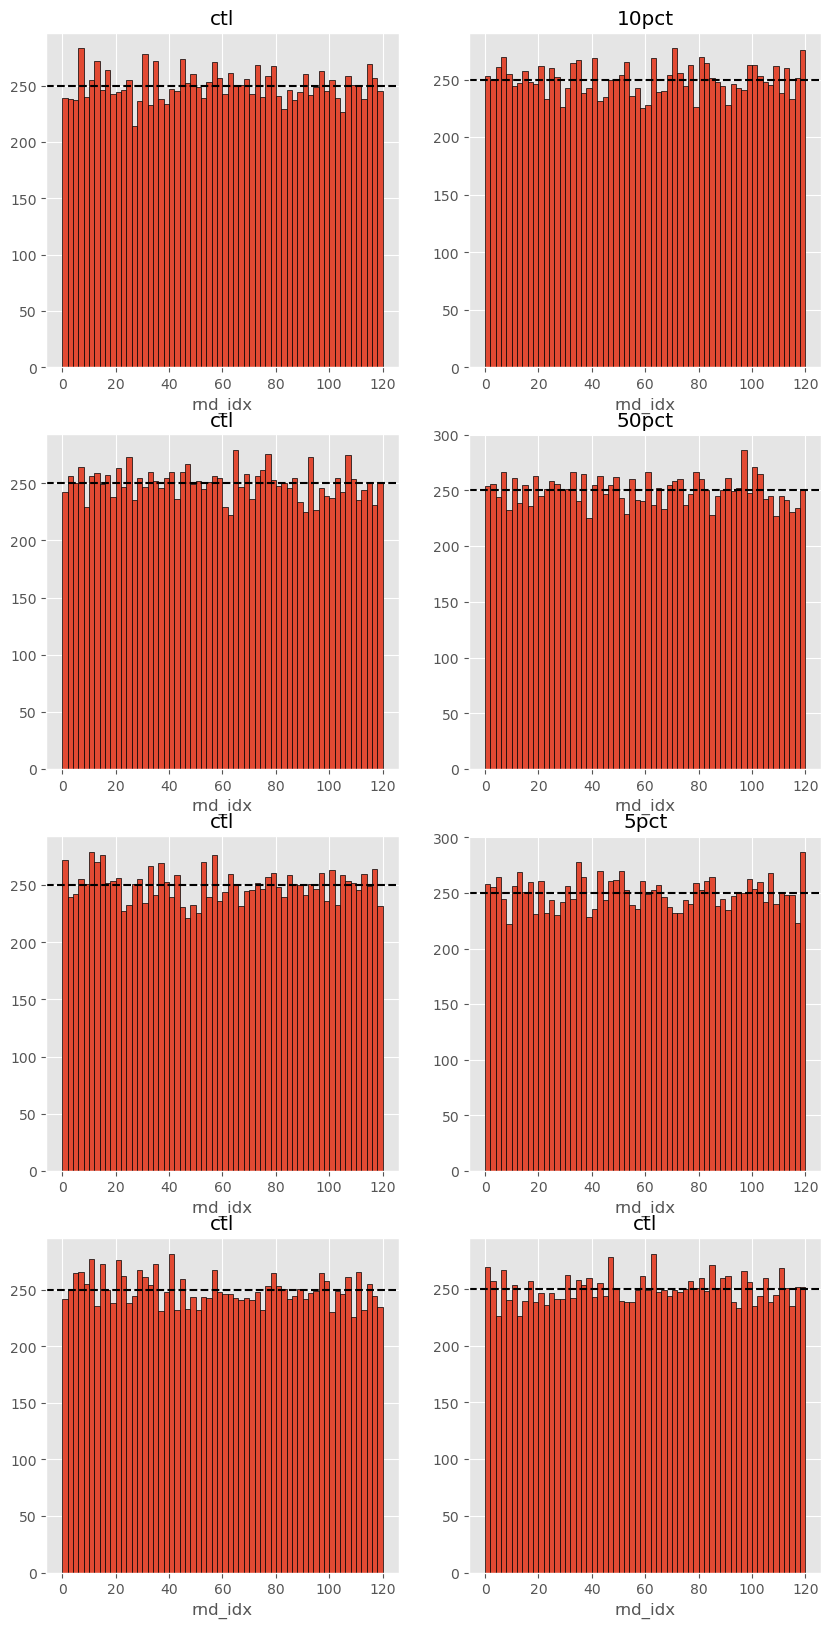

In [16]:
fig, axes = plt.subplots(len(files), 2, figsize=(10, 20))
bins = np.arange(0, 121, 2)
ex_val = 500 / ((bins.shape[0] - 1) / 30)

for file_ix, _file in enumerate(files):
    case_a, case_b = _file.stem.split("_")[2:4]
    cases = [case_a, case_b]
    n_iter = int(_file.stem.split("_")[-1][1:])
    ks_res = xr.open_dataset(_file)
    
    for _case in [0, 1]:
        axes[file_ix, _case].axhline(ex_val, color="k", ls="--")
        _ = ks_res.rnd_idx[_case].plot.hist(edgecolor="k", bins=bins, ax=axes[file_ix, _case])
        axes[file_ix, _case].set_title(cases[_case])
        

In [38]:
bins = np.arange(0, 121, 1)


125.0